## EDA 

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sqrf 
import mplcyberpunk
from datetime import datetime
plt.style.use("cyberpunk")

In [153]:
df = pd.read_csv(r"C:\Users\Administrator\Desktop\Personal Projects\Coffee Shop project\Coffee_Shop_cleaned.csv")
df.head()


,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,product_category,product_type,product_detail,size,hour,total_sales,month_name,day_name
0,114301,2023-06-01,11:33:29 AM,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,11,3.0,Jun-2023,Thursday
1,115405,2023-06-02,11:18:24 AM,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,11,3.0,Jun-2023,Friday
2,115478,2023-06-02,12:02:45 PM,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,12,3.0,Jun-2023,Friday
3,116288,2023-06-02,07:39:47 PM,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,19,3.0,Jun-2023,Friday
4,116714,2023-06-03,12:24:57 PM,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,12,3.0,Jun-2023,Saturday


In [199]:
total_products_sold = df['transaction_id'].count()
print('The total number of products sold is: ' + total_products_sold.astype(str))

The total number of products sold is: 149116


In [200]:
total_sales = df['total_sales'].sum().round(2)
print('Total sales: ', total_sales.astype(str) + '$')

Total sales:  698812.33$


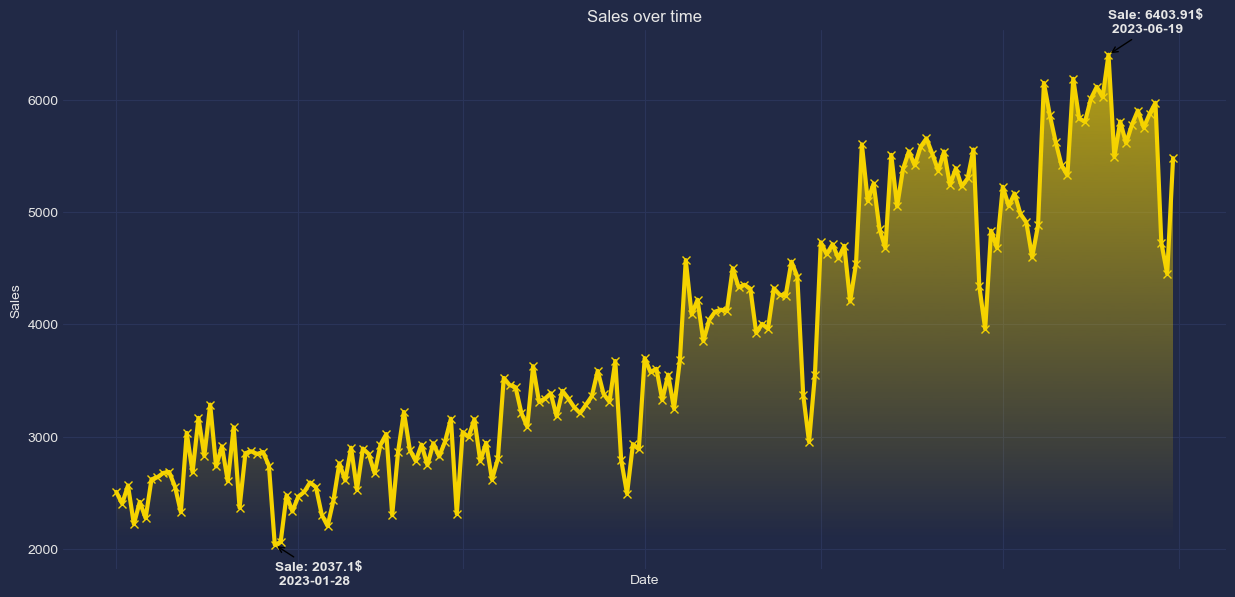

In [202]:
#Sales trend over time
df_sales_over_time= df.groupby('transaction_date')['total_sales'].sum().reset_index()
df_sales_over_time.columns = ['date','total_sales']

dates = [datetime.strptime(date, '%Y-%m-%d') for date in df_sales_over_time['date']]

# Find max and min sales
max_sales_date = df_sales_over_time.loc[df_sales_over_time['total_sales'].idxmax()]
min_sales_date = df_sales_over_time.loc[df_sales_over_time['total_sales'].idxmin()]

max_sales = max_sales_date['total_sales']
max_date = dates[df_sales_over_time['total_sales'].idxmax()]

min_sales = min_sales_date['total_sales']
min_date = dates[df_sales_over_time['total_sales'].idxmin()]

plt.figure(figsize=(15,7))
plt.plot(dates,df_sales_over_time['total_sales'], marker='x', linewidth=3, color="C2")
plt.title("Sales over time")
plt.xlabel("Date")
plt.ylabel("Sales")

plt.annotate(f'Sale: {max_sales}$ \n {max_date.strftime("%Y-%m-%d")}', xy=(max_date, max_sales), xytext=(max_date, max_sales + 200),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontweight='semibold', fontsize= 10)
plt.annotate(f'Sale: {min_sales}$ \n {min_date.strftime("%Y-%m-%d")}', xy=(min_date, min_sales), xytext=(min_date, min_sales - 350),
             arrowprops=dict(facecolor='white', arrowstyle='->'), fontweight='semibold', fontsize= 10)

mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.7)
plt.xticks(visible=False)
plt.show()

<Axes: >

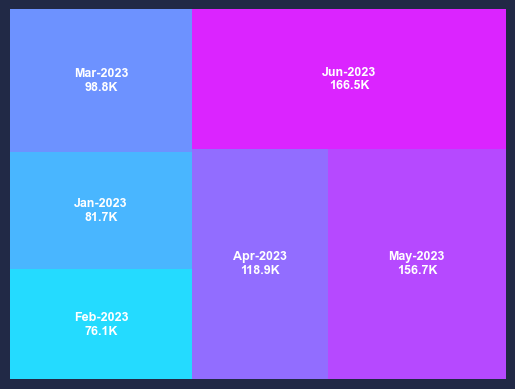

In [154]:
df_sales_by_month = df.groupby('month_name')['total_sales'].sum().reset_index()
df_sales_by_month = df_sales_by_month.sort_values(by='total_sales', ascending=True)
df_sales_by_month['total_sales'] = ((df_sales_by_month['total_sales'].astype('int')/1000).round(1))

labels = [f'{month_name}\n{total_sales}K' for month_name, total_sales in zip(df_sales_by_month.month_name, 
        df_sales_by_month['total_sales'])]

sqrf.plot(df_sales_by_month['total_sales'])
plt.axis('off')
sqrf.plot(sizes=df_sales_by_month['total_sales'], label=labels, text_kwargs={'color':'white', 'fontweight': 'semibold', 'fontsize': 9}, color = sns.color_palette('cool',n_colors=len(df_sales_by_month['month_name'])))

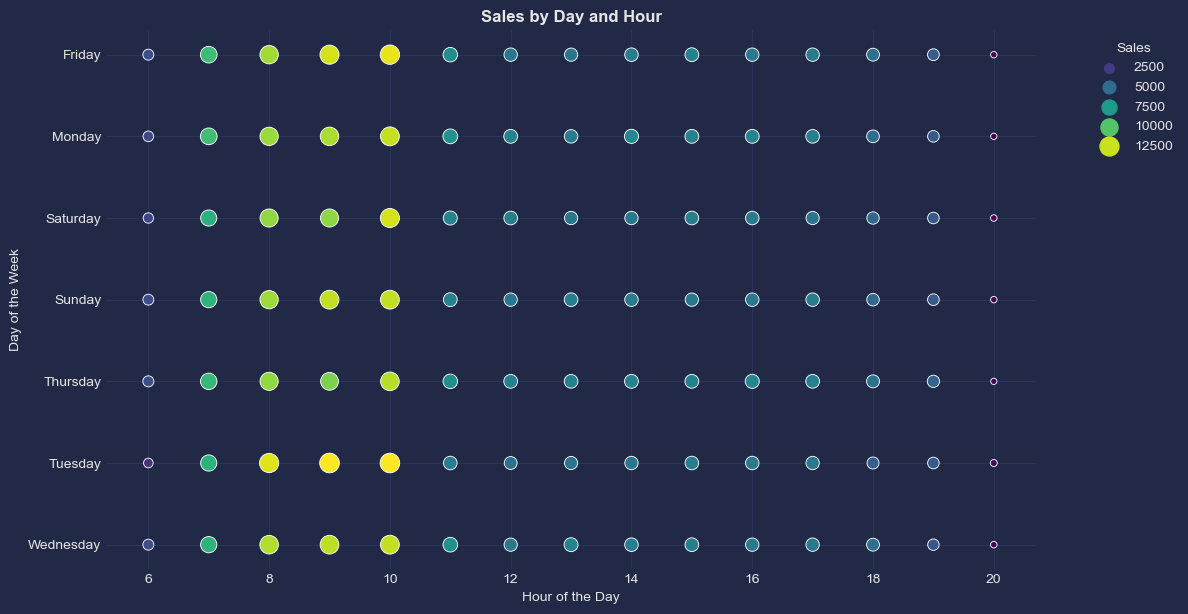

In [198]:
df_sales_peak_time = df.groupby(['day_name', 'hour'])['total_sales'].sum().reset_index()

plt.figure(figsize=(12, 7))

sns.scatterplot(x='hour', y='day_name', size='total_sales', sizes=(20, 200), hue='total_sales', data=df_sales_peak_time, palette='viridis', legend='brief')

plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('Sales by Day and Hour', fontweight='bold')

plt.legend(title='Sales', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


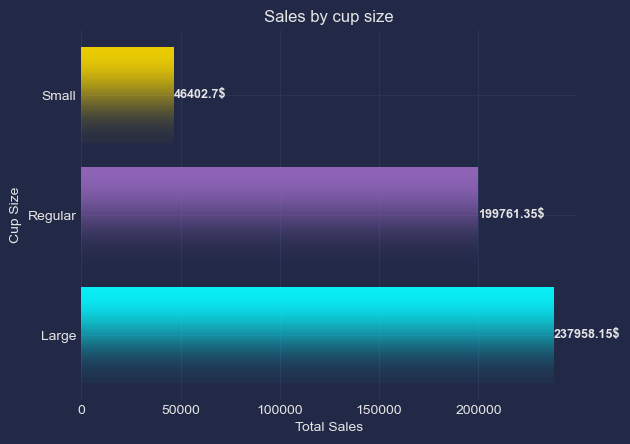

In [201]:
df_sales_by_coffee_size = df.groupby('size')['total_sales'].sum().round(2).reset_index()
df_sales_by_coffee_size = df_sales_by_coffee_size[df_sales_by_coffee_size['size'] != 'Not Defined']
df_sales_by_coffee_size.columns=['cup_size', 'sales']

vals = pd.Series(df_sales_by_coffee_size['sales'].values)
cols = ["C0","C5","C2","C3"]
bars = plt.barh(df_sales_by_coffee_size['cup_size'], df_sales_by_coffee_size['sales'], color=cols)

plt.xlabel('Total Sales')
plt.ylabel('Cup Size')
plt.title('Sales by cup size')

mplcyberpunk.add_bar_gradient(bars=bars)

for index, value in enumerate(vals):
    plt.text(value, index, str(value)+'$', ha='left', va='center', fontsize= 9, fontweight='semibold') 

plt.show()

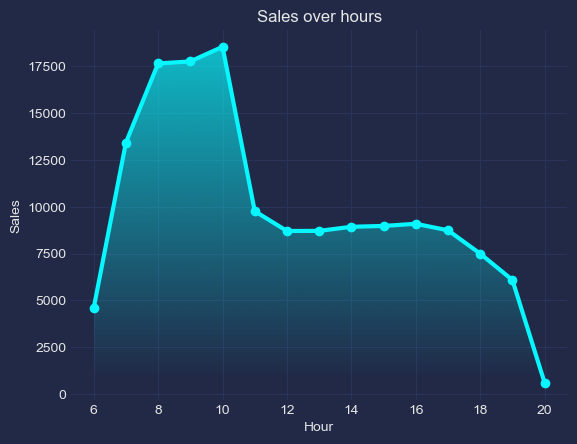

In [69]:
#no of product sold by hour
df_products_sold_by_hour = df.groupby('hour')['transaction_id'].count().reset_index()
df_products_sold_by_hour.columns=['Hour','No of products sold']

plt.plot(df_products_sold_by_hour['Hour'], df_products_sold_by_hour['No of products sold'], linewidth=3, marker = 'o')
plt.title("Sales over hours")
plt.xlabel("Hour")
plt.ylabel("Sales")

mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.7)

plt.show()

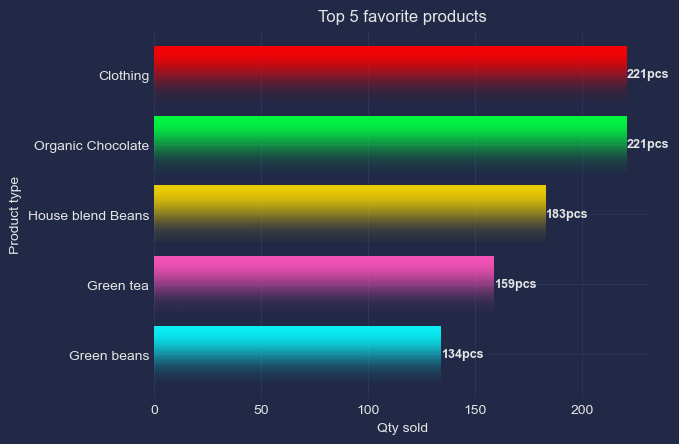

In [194]:
#top 5 most bought products

df_favorite_products = df.groupby('product_type')['transaction_qty'].sum().reset_index()
df_favorite_products.columns=['Prod_type','Qty_sold']
df_top5_fav_prod = df_favorite_products.sort_values(by='Qty_sold', ascending=True).iloc[:5]

val = pd.Series(df_top5_fav_prod['Qty_sold'].values)
colors=["C0","C1","C2","C3","C4"]
bars = plt.barh(df_top5_fav_prod['Prod_type'],df_top5_fav_prod['Qty_sold'],color=colors)

plt.title("Top 5 favorite products")
plt.ylabel("Product type")
plt.xlabel("Qty sold")
mplcyberpunk.add_bar_gradient(bars=bars)

for index, value in enumerate(val):
    plt.text(value, index, str(value)+'pcs', ha='left', va='center', fontsize= 9, fontweight='semibold')

plt.show()

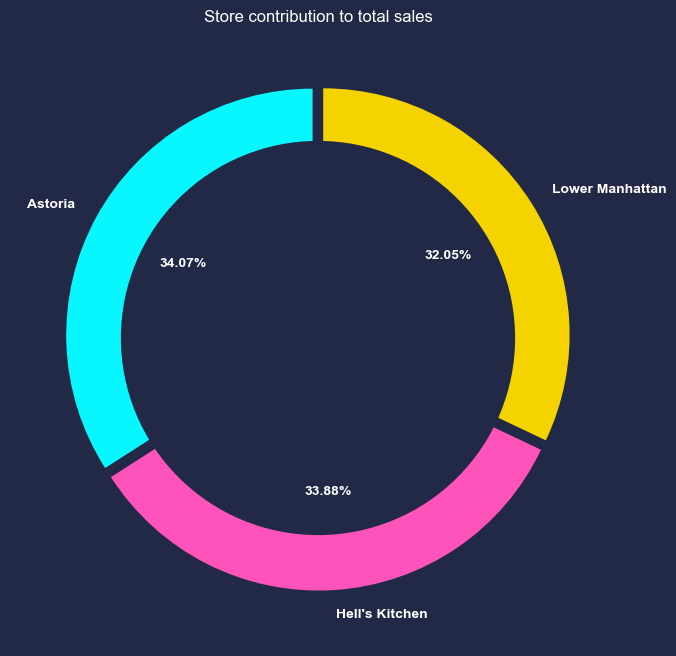

In [81]:
#Store performance (compare the stores by analyzing the total sales or transaction counts)

def custom_autopct(pct):
    return f'{pct:.2f}%' 
    
total_transactions = df['transaction_id'].count()
fig, ax = plt.subplots(figsize=(8, 8))
fig.patch.set_facecolor('#212946')

explode = (0.025, 0.025, 0.025)  

df_shop_performances = df.groupby('store_location')['transaction_id'].sum().reset_index()
df_shop_performances.columns= ['store_location', 'transactions']

data_for_pie = pd.Series(data=df_shop_performances['transactions'].values, index=df_shop_performances['store_location'])
data_for_pie.plot(kind='pie', autopct=custom_autopct, startangle=90, textprops={'color': 'white',  'weight': 'semibold', 'fontsize': 10}, explode=explode)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.80, fc='#212946')
fig.gca().add_artist(centre_circle)

plt.title('Store contribution to total sales', color="white")

plt.show()

<Axes: >

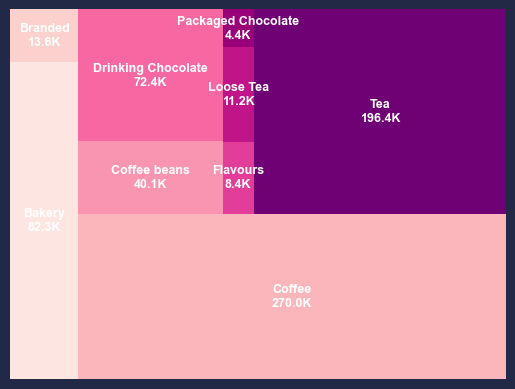

In [107]:
#Sales by category
df_sales_per_categ = df.groupby('product_category')['total_sales'].sum().reset_index()
df_sales_per_categ.columns = ['category','sales']
df_sales_per_categ['sales_k'] = (round(df_sales_per_categ['sales'],-2)/1000).astype(str)+'K'



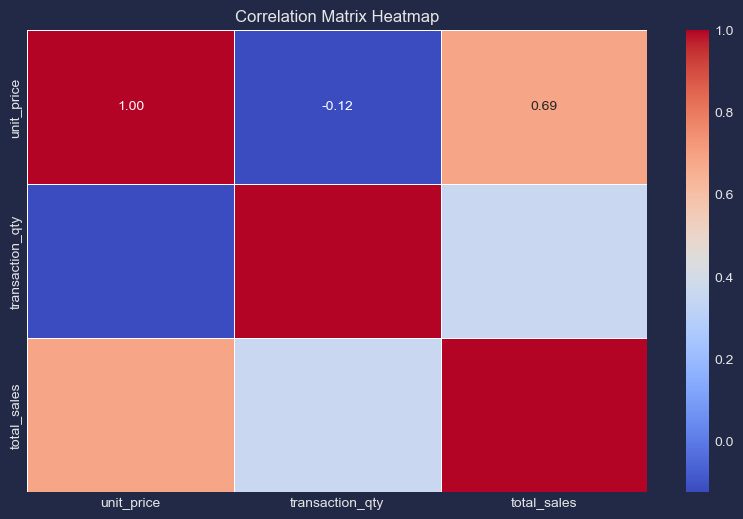

In [195]:
df_corr = df[['unit_price','transaction_qty','total_sales']].copy()
correlation_matrix = df_corr.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

# Title and labels
plt.title('Correlation Matrix Heatmap')
plt.show()


Specific Observations 


Unit Price and Transaction Quantity:
Correlation: -0.12
Interpretation: There is a very weak negative correlation between unit price and transaction quantity. This suggests that as the unit price slightly increases, the transaction quantity slightly decreases, but this relationship is very weak.

Unit Price and Total Sales:
Correlation: 0.69
Interpretation: There is a moderate to strong positive correlation between unit price and total sales. This suggests that as the unit price increases, the total sales also tend to increase.


Transaction Quantity and Total Sales:
Correlation: 0.00
Interpretation: There is no correlation between transaction quantity and total sales. This suggests that changes in transaction quantity do not have a linear relationship with total sales in your dataset.

Summary:
Strongest Relationship: The strongest relationship is between unit price and total sales (0.69), indicating that higher unit prices are associated with higher total sales.
Weakest Relationship: The weakest relationship is between transaction quantity and total sales (0.00), indicating no linear relationship between these variables.
Negative Correlation: There is a very weak negative correlation between unit price and transaction quantity (-0.12).